In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../data/qqq_supervised.csv", index_col=0, parse_dates=True)

In [27]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Define features: all columns except target
feature_cols = [col for col in df.columns if col != 'Target' and not col.endswith('Return')]

X = df[feature_cols]
y = df['Target']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [28]:
model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_pred = model.predict(X_test)

print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

📊 Accuracy: 0.98989898989899

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.99      1.00      0.99       247

    accuracy                           0.99       297
   macro avg       0.99      0.98      0.98       297
weighted avg       0.99      0.99      0.99       297



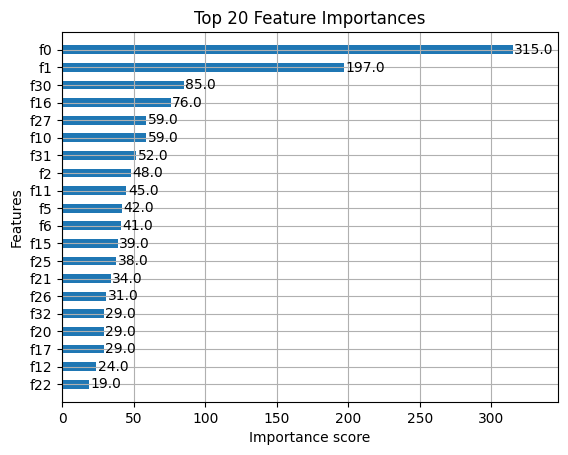

In [30]:
plot_importance(model, max_num_features=20, height=0.5)
plt.title("Top 20 Feature Importances")
plt.show()

In [31]:
import joblib

# Save XGBoost model
model_filename = "../models/day7_xgb_multi_etf_classifier.json"
model.save_model(model_filename)

# Save Scaler (for future predictions)
scaler_filename = "../models/day7_xgb_scaler.pkl"
joblib.dump(scaler, scaler_filename)

print(f"Model saved to: {model_filename}")
print(f"Scaler saved to: {scaler_filename}")


Model saved to: ../models/day7_xgb_multi_etf_classifier.json
Scaler saved to: ../models/day7_xgb_scaler.pkl
